In [87]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
import skimage.io
from skimage import transform 
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import transform
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import cv2
import seaborn as sns
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.cluster import KMeans
from joblib import Parallel, delayed
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize

In [63]:
def load_data(data_directory, num_directories=5):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for i, d in enumerate(directories):
        if i >= num_directories:
            break
        
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".png")]
        
        for f in file_names:
            img = skimage.io.imread(f)
            images.append(img)
            labels.append(int(d))
            
    return images, labels

In [64]:
ROOT_PATH = "C:/Users/Mohmammed ahmed/Downloads/archive"
train_data_directory = os.path.join(ROOT_PATH, "Train") 
test_data_directory = os.path.join(ROOT_PATH, "Test")  

train_images, train_labels = load_data(train_data_directory, num_directories=5)#X_train ,y_train

test_images, test_labels = load_data(train_data_directory, num_directories=5)#X_test, y_test
print('train_image',len(train_images))
print('train_labels',len(train_labels))
print('test_images',len(test_images))
print('test_labels',len(test_labels))

train_image 7860
train_labels 7860
test_images 7860
test_labels 7860


In [65]:
# Function to Preprocess Images for HOG
def preprocess_images_for_hog(images, size=(32, 32)):
    processed_images = []
    for img in images:
        # Resize image
        resized_img = cv2.resize(img, size, interpolation=cv2.INTER_AREA)
        
        # Convert to grayscale if it has three channels
        if resized_img.shape[-1] == 3:
            grayscale_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        else:
            grayscale_img = resized_img
        
        processed_images.append(grayscale_img)
    return np.array(processed_images)

In [66]:
# Preprocess train and test images
train_images_processed = preprocess_images_for_hog(train_images)
test_images_processed = preprocess_images_for_hog(test_images)

In [67]:
# Compute HOG features for Training images
train_hog_features = []
for img in train_images_processed:
    hog_img = hog(img, visualize=False)
    train_hog_features.append(hog_img)
    
# Train logistic regression model

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,max_iter=1000)

LogisticRegressionModel .fit(train_hog_features, train_labels) #train_hog_features(x_train) ,#train_labels(y_train)
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(train_hog_features, train_labels))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

LogisticRegressionModel Train Score is :  0.9931297709923664
LogisticRegressionModel Classes are :  [ 0  1 10 11 12]
LogisticRegressionModel No. of iteratios is :  [34]


LogisticRegressionModel Test Score is :  0.9931297709923664
Predicted Value for LogisticRegressionModel is :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1]
real output [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Prediction Probabilities Value for LogisticRegressionModel is :  [[0.33063546 0.60160262 0.03070476 0.02396969 0.01308746]
 [0.47186812 0.43794227 0.02797858 0.05209746 0.01011358]
 [0.80575045 0.12733173 0.01114848 0.03317353 0.02259581]
 [0.48329806 0.35349781 0.11627769 0.03251414 0.01441231]
 [0.74625999 0.23304115 0.00640161 0.01139719 0.00290005]
 [0.4378602  0.523561   0.02486239 0.01197688 0.00173954]
 [0.79624291 0.15206168 0.01170269 0.02918876 0.01080396]
 [0.87853272 0.08924825 0.00923718 0.0148963  0.00808555]
 [0.6823475  0.2844304  0.01778441 0.01189274 0.00354495]
 [0.80696482 0.17441044 0.0077621  0.00959309 0.00126955]]
Accuracy of logistic regression with H

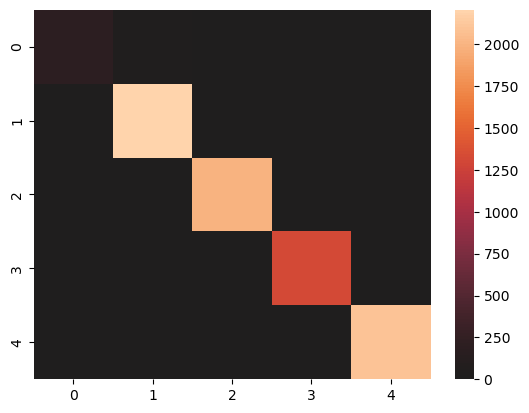

In [84]:
# Compute HOG features for test images
test_hog_features = []
for img in test_images_processed:
    hog_img = hog(img, visualize=False)
    test_hog_features.append(hog_img)
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(test_hog_features, test_labels))
#Calculating Prediction
y_pred_log = LogisticRegressionModel.predict(test_hog_features) #test_hog_features(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(test_hog_features)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred_log[7:45])
print('real output',test_labels[7:45])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])
# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred_log)#test_labels(y_test)
print(f"Accuracy of logistic regression with HOG features: {accuracy}")
#calculating error 
MAEValue = mean_absolute_error(test_labels, y_pred_log, multioutput='uniform_average')
print('error in this code :',MAEValue)
#Calculating Confusion Matrix
CM = confusion_matrix(test_labels, y_pred_log)
#print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()
MAEValue = mean_absolute_error(test_labels, y_pred_log, multioutput='uniform_average')


In [70]:
HOG_images_train = np.array(train_hog_features)
HOG_images_train.shape

(7860, 324)

In [71]:
#k_mean train
KMeansModel = KMeans(n_clusters=8,init='k-means++', n_init=10,max_iter=1000,tol=0.0001,random_state=42 ) 
KMeansModel.fit(HOG_images_train)

#Calculating Details
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)


KMeansModel centers are :  [[0.07653746 0.03628346 0.05331965 ... 0.02665827 0.02541407 0.03070211]
 [0.10174768 0.0410111  0.04119141 ... 0.03328834 0.06057477 0.06300419]
 [0.07628895 0.03878021 0.07952889 ... 0.02225214 0.02122331 0.0430504 ]
 ...
 [0.04793336 0.01458503 0.01758251 ... 0.02933865 0.03240563 0.07593626]
 [0.05578134 0.01471824 0.01954106 ... 0.01392572 0.0090531  0.0118317 ]
 [0.10535909 0.03479881 0.02788829 ... 0.02291824 0.02593013 0.05463086]]
KMeansModel intertia is :  6471.970785043613
KMeansModel No. of iteration is :  42


In [72]:
HOG_images_test = np.array(test_hog_features)
HOG_images_test.shape

(7860, 324)

In [93]:
#k-mean test
#Calculating Prediction
y_pred_KM = KMeansModel.predict(HOG_images_test)
print('Predicted Value for KMeansModel is : ' , y_pred[:10])



Predicted Value for KMeansModel is :  [10 10 10 10 10 10 10 10 10 10]


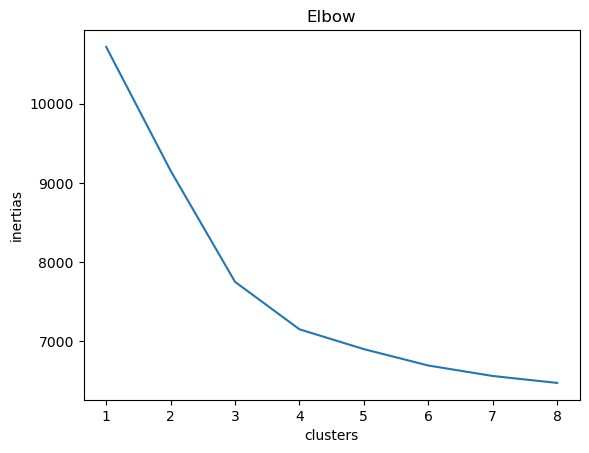

In [94]:
import warnings

# Filter FutureWarnings related to KMeans
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")
ilist = []
n = 9
for i in range(1,n):
    KMeansModel = KMeans(n_clusters = i)
    KMeansModel.fit(HOG_images_train)
    ilist.append(KMeansModel.inertia_)
    
plt.plot(range(1,n), ilist)
plt.title('Elbow')
plt.xlabel('clusters')
plt.ylabel('inertias')
plt.show()


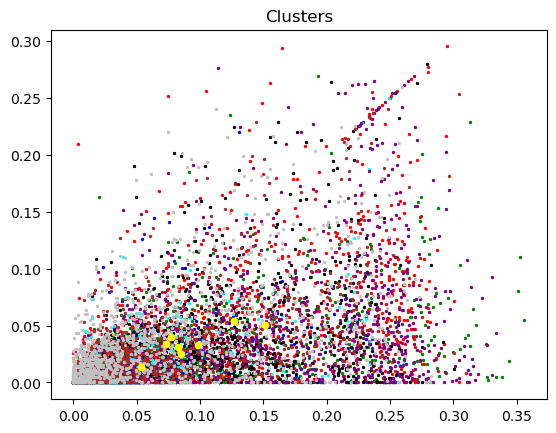

In [95]:
    plt.scatter(HOG_images_train[y_pred_KM == 0, 0], HOG_images_train[y_pred_KM == 0, 1], s = 2, c = 'blue', label = 'Cluster 1')  
    plt.scatter(HOG_images_train[y_pred_KM == 1, 0], HOG_images_train[y_pred_KM == 1, 1], s = 2, c = 'green', label = 'Cluster 2')  
    plt.scatter(HOG_images_train[y_pred_KM== 2, 0], HOG_images_train[y_pred_KM == 2, 1], s = 2, c = 'red', label = 'Cluster 3')  
    plt.scatter(HOG_images_train[y_pred_KM == 3, 0], HOG_images_train[y_pred_KM == 3, 1], s = 2, c = 'cyan', label = 'Cluster 4')   
    plt.scatter(HOG_images_train[y_pred_KM == 4, 0], HOG_images_train[y_pred_KM == 4, 1], s = 2, c = 'black', label = 'Cluster 5') 
    plt.scatter(HOG_images_train[y_pred_KM == 5, 0], HOG_images_train[y_pred_KM == 5, 1], s = 2, c = 'Purple', label = 'Cluster 6') 
    plt.scatter(HOG_images_train[y_pred_KM == 6, 0], HOG_images_train[y_pred_KM == 6, 1], s = 2, c = 'Brown', label = 'Cluster 7')
    plt.scatter(HOG_images_train[y_pred_KM == 7, 0], HOG_images_train[y_pred_KM == 7, 1], s = 2, c = 'Silver', label = 'Cluster 8')
    plt.scatter(KMeansModel .cluster_centers_[:, 0], KMeansModel .cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroid')   
    plt.title('Clusters')   
    #plt.legend()  
    plt.show()

In [100]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(test_labels, y_pred_log)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()


ValueError: multiclass format is not supported